# <span style="color:orange"> Analysis of the Palmer Penguins Dataset.<span>
*By Laura Lyons*
***

## <span style="color:orange"> Table of contents<span>
***
1. [Introduction](#10-introduction)
2. [Method](#2-methods)\
   2.1. [Prerequisites/ Imports](#21-prerequisites-imports)\
   2.2. [Warnings](#22-warnings)\
   2.3. [Load the Data](#23-load-the-data)
3. [Results](#30-results)\
   3.1 [Data Overiew](#32-data-clean-up)\
   3.2 [Data Clean-up](#32-data-clean-up)\
   3.3 [Data Analysis](#33-data-analysis)\
   3.4 [Data Correlation](#34-data-correlation)\
   3.5 [Regression Analysis](#35-regression-analysis)
4. Discussion and Conclusion
5. [References](#references)

## <span style="color:orange"> **1.    Introduction**<span>
***
The Palmer Penguin’s data set is a collaboration of 3 sets of field results, collected by [K.B. Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php), at the Palmer Station in Antarctica, between 2007- 2009 and published in 2020. Three penguin species of the genus *Pygoscelis* were studied across 3 Islands, to analyis potential sexual and ecologial dimorphisim due to differing habitat preference (Figure 1.1). Since then, the data was released for public use as a teaching tool for data exploration and visualisation [(Gorman *et. al* 2020)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081). 

The raw data set is available [on GitHub](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/346px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg" alt="*P.adelidae*" width="200" height="300"/> |<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/800px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg" alt="*P.antarctica*" width="200" height="300"/>|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg/1024px-Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg" alt="*P.papua*" width="300" height="450" />|
|:---------:|:---------:|:---------:|
| *P. adelidae*| *P. antarctica*| *P. papua*|

Figure 1.1 Three species *Pygoscelis* penguins studied during the Palmer Penguins Dataset.

*Reference: Pictures by Andrew Shiva / Wikipedia, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=46674168*
***

The aim of this project is to demonstrate the knowledge to both research and analyis the famous [Palmer Penguins Data Set](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv), using both instruction provided in the lectures, data analysis complete by previous analyists and also based on my own research.


## <span style="color:orange"> **2.    Methods** <span>
***

#### <span style="color:orange">2.1    Prerequisites/ Imports <span>

A number of imports were used to help with the data analysis and visualisation.

1. **Pandas**: for for the DataFrame data structure and forstoring, manipulating and working with structured data. It allows us to investigate CSV files, amongst other features.
1. **NumPy**: as it creates efficient data structures for dealing with numerical data in python. Reference Lecture 5. Module Principles of Data Analytics.
1. **Matplotlib.pyplot:** for creating plots.
1. **Seaborn**: matplotlib sub-library for creating attractive data visualisation.
1. **SciPy**: According to [SciPy.org](https://scipy.org/) SciPy extends NumPy, providing additional tools for array computing and provides specialized data structures, such as sparse matrices and k-dimensional trees.

In [47]:
# Data frames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

***
#### <span style="color:orange">2.2    Warnings  <span>

A FutureWarning appeared after initally running Seaborn.

```
FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version.Convert inf values to NaN before operating instead. with pd.option_context('mode.use_inf_as_na', True):
```
    
Internet research recommended the below code to sort the issue: \
The pandas package was updated using

```
pip install --upgrade pandas
pip install --upgrade seaborn
```

As a final resort i will ignore FutureWarnings until an alternative solution can be found.


In [48]:
# Code used to ignore the FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***
#### <span style="color:orange"> 2.3   Load the Data<span>
The palmer penguins data set was loaded from a [URL](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). This URL was choosen as it the headers for the variables are predefinied, with the unit of measurement included.

Once the data was loaded, it allowed analysis/ investigate the data to begin.

In [49]:
# Load the penguins data set.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

## <span style="color:orange"> **3. Results** <span>
***

#### <span style="color:orange">  3.1    Data Overview <span>

An overview of the data would be of interest, so that we could decifer the type and number of variables present. 

From Table 3.1, we can see that there are 7 variables, of which 3 are categorical (object), species, island and sex (which is also a bivariate object) and 4 are continious quantitative (float64) (bill length, bill depth, flipper length and body mass).

It would be useful to know:
1. How many species were analyised, and the total number of penguins measured for each species.
1. Which islands were the penguins from and how many penguins were measured from each island.
1. What was the sexual variation within the data set.

This data was extracted using the below code and visualised using annnoted bar charts.

    df[ ].value_counts

In [50]:
# An overview of the data.
print('Table 3.1: An overview of the Palmer Penguins dataset.')
df 

Table 3.1: An overview of the Palmer Penguins dataset.


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [51]:
# Lets inspect the variable types.
print('Table 3.2: The types of data recorded in each of the variables, of the Palmer Penguins dataset.')
df.dtypes

Table 3.2: The types of data recorded in each of the variables, of the Palmer Penguins dataset.


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [52]:
# It would be useful to know how many of each species were analised and the total number of penguins measured for each species.
print('Table 3.3: The number of penguins measured for each species.')
df ['species'].value_counts()

Table 3.3: The number of penguins measured for each species.


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [53]:
# This will help detail how many were measures at each island.
print('Table 3.4: The number of penguins measured on each Island.')
df ['island'].value_counts()

Table 3.4: The number of penguins measured on each Island.


island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [54]:
# Lets look at the last col. Sex ie the number of penguins of each sex.
print('Table 3.5: The number of male and female penguins measured, in the Palmer Penguins dataset.')
df ['sex'].value_counts()

Table 3.5: The number of male and female penguins measured, in the Palmer Penguins dataset.


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

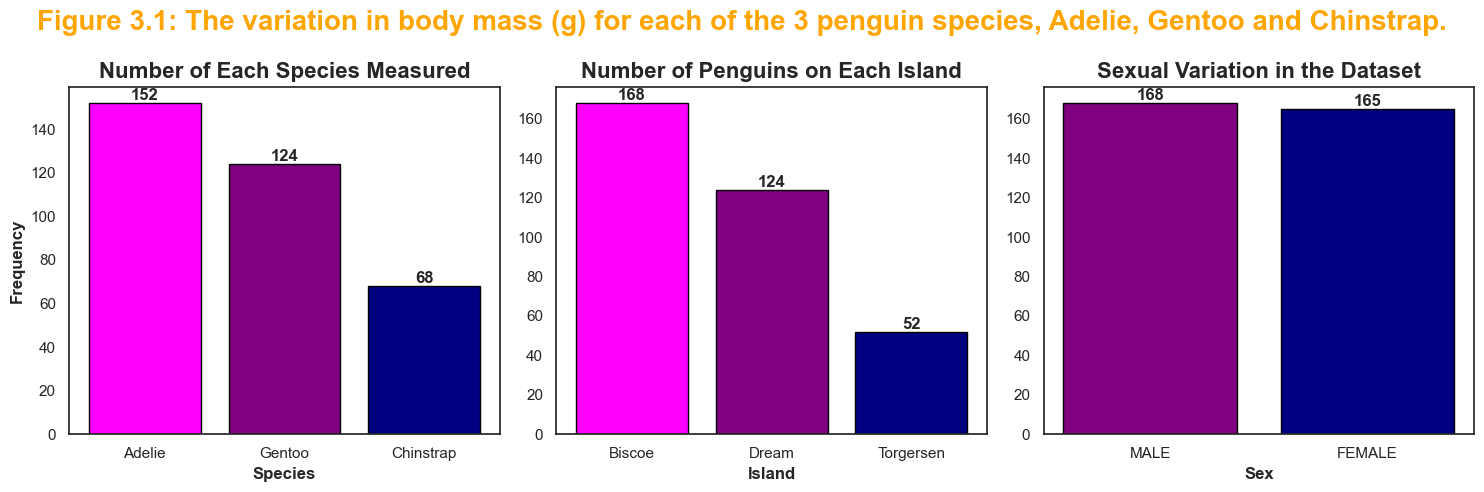

In [55]:
# Lets visualise the above data.
species_counts= df ['species'].value_counts()
island_counts= df ['island'].value_counts()
sex_counts= df ['sex'].value_counts()

# lets add some colour to the graphs ['magenta','purple','navy']
species_colors = ['magenta','purple','navy']
island_colors = ['magenta','purple','navy']
sex_colors = ['purple','navy']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Species
axs[0].bar(species_counts.index, species_counts.values, edgecolor='black', color=species_colors)
axs[0].set_xlabel('Species',fontweight='bold')
axs[0].set_ylabel('Frequency',fontweight='bold')
axs[0].set_title('Number of Each Species Measured',fontsize=16,fontweight='bold')
# AI was used to help generate this text
for i, v in enumerate(species_counts.values):
    axs[0].text(i, v, str(v), ha='center', va='bottom',fontweight='bold') 

# Island
axs[1].bar(island_counts.index, island_counts.values, edgecolor='black', color=island_colors)
axs[1].set_xlabel('Island',fontweight='bold')
axs[1].set_title('Number of Penguins on Each Island',fontsize=16, fontweight='bold')
for i, v in enumerate(island_counts.values):
    axs[1].text(i, v, str(v), ha='center', va='bottom',fontweight='bold')

# Sex
axs[2].bar(sex_counts.index, sex_counts.values, edgecolor='black', color=sex_colors)
axs[2].set_xlabel('Sex',fontweight='bold')
axs[2].set_title('Sexual Variation in the Dataset',fontsize=16,fontweight='bold')
for i, v in enumerate(sex_counts.values):
    axs[2].text(i, v, str(v), ha='center', va='bottom',fontweight='bold')

fig.suptitle ('Figure 3.1: The variation in body mass (g) for each of the 3 penguin species, Adelie, Gentoo and Chinstrap.', 
             fontsize=20,fontweight='bold', color='orange')
plt.tight_layout()
plt.show()

Figure 3.1, is a visual representation of the value counts previously calculated (Tables 3.3, 3.4 & 3.5) for species, island and sex. We can see that 344 penguins were analyised for 7 different variables. Three species of penguin, Adelie, Gentoo and Chinstrap, were studied from 3 difference islands, Brisceo, Dream and Torgersen Island, with a total of 168 male and 165 females measured during the study.

The 7 variables measured were:

1. Species (152 *Adelie*, 124 *Gentoo* and 68 *Chinstrap*).
1. Island (168 penguins were measured on Brisceo Island, 124 on Dream Island and 52 on Torgersen Island)
1. Sex (168 ,male penguins and 165 female penguins)
1. Bill Length (mm)
1. Bill depth (mm)
1. Flipper length (mm) 
1. Body mass (g)

***
#### <span style="color:orange"> 3.2    Data Clean-up <span>

From the initial overview of the dataframe, we can see that our data contains a number of missing values, coded as 'NaN'. It would be helpful to know how many missing values the data set contains.

In [56]:
# Before we delve into our data analysis, it would be good practice to check for the presence of missing values.
print('Table 3.6: The number of NaN data entries within the Palmer Panguin dataset.')
df.isnull().sum() 

Table 3.6: The number of NaN data entries within the Palmer Panguin dataset.


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

From Table 3.6, we can see that there are 19 missing values, present in 5 of the 7 variables. Best practice would be to identify (as above) and treat both potential null and duplicate values [(Dash, 2022)](https://www.analyticsvidhya.com/blog/2022/04/data-exploration-and-visualisation-using-palmer-penguins-dataset/).

After identifying the location of the missing values we need to decide how to treat these variables. There are 2 options:

1. We can decide to delete the rows/ columns with the missing data, if this will not have an impact on the data set; or
2. We can replace the missing values using the mean, median or mode of the variable in question [(Yakubu, 2023,](https://yabdulmalik.medium.com/python-data-analysis-project-palmer-penguins-dataset-411a1e0b8c7d) [Bankar, 2023)](https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a)

Handling missing data is important, as some machine learning algorithms do not support data with missing values (Bankar, 2023). The most commen method used to deal with missing values is imputation, which can be defined as:\
"*A process to assign or substitute the missing row/ column value with the dedired/calculated value*" (Chauhan, 2023)

Imputation techniques include:
1. Statistic: where a statistical value is calculated for each column (*i.e.* the mean), and this is then used to replace the missing values within that column.
1. Mean: where an educated guess is used to produced a number to replace the missing values within each column.
1. Mode: This is where the mean values of the entir column in question is used to replace the missing values.
1. Uni-variate: The missing data is replaced by the mean/median/random value (Bankar, 2023).

For this analysis, we are going to replace the missing values using the first method mentioned above, replacing the missing values with the mean of that column.

In [57]:
# To get the mean value of variable, we first need to remove the missing data, we can start with bill length.
mean_value = df ['bill_length_mm'].mean()
df ['bill_length_mm'] = df['bill_length_mm'].fillna(mean_value)

mean_value = df ['bill_depth_mm'].mean()
df ['bill_depth_mm'] = df['bill_depth_mm'].fillna(mean_value)

mean_value = df ['flipper_length_mm'].mean()
df ['flipper_length_mm'] = df['flipper_length_mm'].fillna(mean_value)

mean_value = df ['body_mass_g'].mean()
df ['body_mass_g'] = df['body_mass_g'].fillna(mean_value)

# Check that the missing values have been replaced
print('Table 3.7: Updated number of NaN data entries, following initial data cleanup.')
df.isnull().sum()


Table 3.7: Updated number of NaN data entries, following initial data cleanup.


species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

For now, it would be best to remove rows where the sex of the penguin is undefined, as i hope to look at the morphometric variation of the penguins not only between species but also intra species, by sex. Once this has been complete, the data set will be considered clean. It is best practice to save this new dataset under a new name, in case you need to revert back to the original data set at any time.

In [58]:
# Remove rows where the 'sex' column has NaN values
dfcleaned = df.dropna(subset=['sex'])

# Save the cleaned dataset to a new CSV file
dfcleaned.to_csv('cleaned_dataset.csv', index=False)

# Check to see the data set is clean.
print('Table 3.8: The updated number of NaN values within the data set, after cleanup')
dfcleaned.isnull().sum()

Table 3.8: The updated number of NaN values within the data set, after cleanup


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

We now have a clean data set, with no missing values, ready for data analysis.

***
#### <span style="color:orange"> 3.3    Data Analysis <span>

<span style="color:orange"> Descriptive statistics. <span>

Discription statistics utilise both categorical and numerical (quantitative) variables. The categorical variables can be used to subdivde the numerical variables and can often help in defining trends and anomolies.

Lets start by getting an overview of the data set, by looking at each variable in turn, subdivided by species and sex.
1. Bill length (mm) (Table 3.9)
1. Bill depth (mm) (Table 3.10)
1. Flipper length (mm) (Table 3.11)
1. Body mass (g) (Table 3.12)

The summary statics species for this analysis were:

- Count   
- Mean  
- Standard Deviation  
- Minimum    
- 50%    
- Maximum.

These statistics will be very helpful when we move onto data visualisation, as we will be able to use the max and min statistics to help refine graph sizes.

In [59]:
# Describe the data set.
# Specify the columns for which you want descriptive statistics
variables_of_interest = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Lets specify the descriptive statistics that we want to generate, lets leave out 25% and 75%
percentiles = [0.5]

# Group the data by 'species' and 'sex', then describe each group.
# Bill Length (mm)
grouped_description_bl = dfcleaned.groupby(['species', 'sex'])['bill_length_mm'].describe(
    percentiles=percentiles).map(lambda x: f"{x:0.2f}")
# .map(lambda x: f"{x:0.2f}"), was used to limit the number of decimal points display to 2.
# Print the descriptive statistics for each group
print('Table 3.9: The summary statistics of bill length (mm), subdivided by species and sex')
print(grouped_description_bl)

# Bill depth (mm)
grouped_description_bw = dfcleaned.groupby(['species', 'sex'])['bill_depth_mm'].describe(
    percentiles=percentiles).map(lambda x: f"{x:0.2f}")
print('\nTble 3.10: The summary statistics of bill depth (mm), subdivided by species and sex')
print(grouped_description_bw)

Table 3.9: The summary statistics of bill length (mm), subdivided by species and sex
                  count   mean   std    min    50%    max
species   sex                                            
Adelie    FEMALE  73.00  37.26  2.03  32.10  37.00  42.20
          MALE    73.00  40.39  2.28  34.60  40.60  46.00
Chinstrap FEMALE  34.00  46.57  3.11  40.90  46.30  58.00
          MALE    34.00  51.09  1.56  48.50  50.95  55.80
Gentoo    FEMALE  58.00  45.56  2.05  40.90  45.50  50.50
          MALE    61.00  49.47  2.72  44.40  49.50  59.60

Tble 3.10: The summary statistics of bill depth (mm), subdivided by species and sex
                  count   mean   std    min    50%    max
species   sex                                            
Adelie    FEMALE  73.00  17.62  0.94  15.50  17.60  20.70
          MALE    73.00  19.07  1.02  17.00  18.90  21.50
Chinstrap FEMALE  34.00  17.59  0.78  16.40  17.65  19.40
          MALE    34.00  19.25  0.76  17.50  19.30  20.80
Gentoo    FEMALE  

In [60]:
# Flipper Length (mm)
grouped_description_fl = dfcleaned.groupby(['species', 'sex'])['flipper_length_mm'].describe(
    percentiles=percentiles).map(lambda x: f"{x:0.2f}")
print('\nTable 3.11: The summary statistics of flipper length (mm), subdivided by species and sex')
print(grouped_description_fl)

# Body mass (g)
grouped_description_bm = dfcleaned.groupby(['species', 'sex'])['body_mass_g'].describe(
    percentiles=percentiles).map(lambda x: f"{x:0.2f}")
print('\nTable 3.12: The summary statistics of body mass (g), subdivided by species and sex')
print(grouped_description_bm)


Table 3.11: The summary statistics of flipper length (mm), subdivided by species and sex
                  count    mean   std     min     50%     max
species   sex                                                
Adelie    FEMALE  73.00  187.79  5.60  172.00  188.00  202.00
          MALE    73.00  192.41  6.60  178.00  193.00  210.00
Chinstrap FEMALE  34.00  191.74  5.75  178.00  192.00  202.00
          MALE    34.00  199.91  5.98  187.00  200.50  212.00
Gentoo    FEMALE  58.00  212.71  3.90  203.00  212.00  222.00
          MALE    61.00  221.54  5.67  208.00  221.00  231.00

Table 3.12: The summary statistics of body mass (g), subdivided by species and sex
                  count     mean     std      min      50%      max
species   sex                                                      
Adelie    FEMALE  73.00  3368.84  269.38  2850.00  3400.00  3900.00
          MALE    73.00  4043.49  346.81  3325.00  4000.00  4775.00
Chinstrap FEMALE  34.00  3527.21  285.33  2700.00  3550.00

From the summary statistics (Tables 3.9, 3.10, 3.11 & 3.12) body mass appears to display the most variation, so I decided to plot the weight of the penguins, according to species, using a histogram. From Figure 3.4, we can clearly see that the Adelie penguins are the lightest species and the Gentoo the heaviest penguins. This variation is easier to observe from the first plot, they are are plotted over each other, on the same graph. 

The second plot (Figure 3.5), includes a Gausiann curve, which helps us to visual the normality of the data. Both the Adelie and the Gentoo datasets appear to follow a normal, ball shaped distribution curve. The curve of the Chinstrap data is appears to have 2 peaks, which could be indicitative of sexual dimorphism within the Chinstrap species.

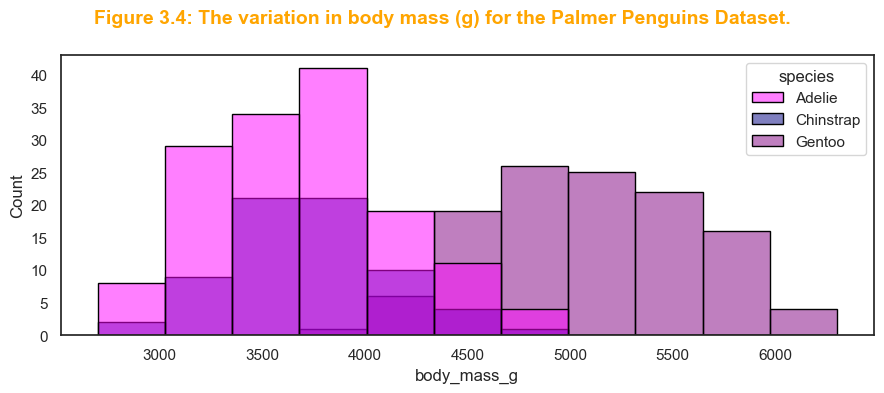

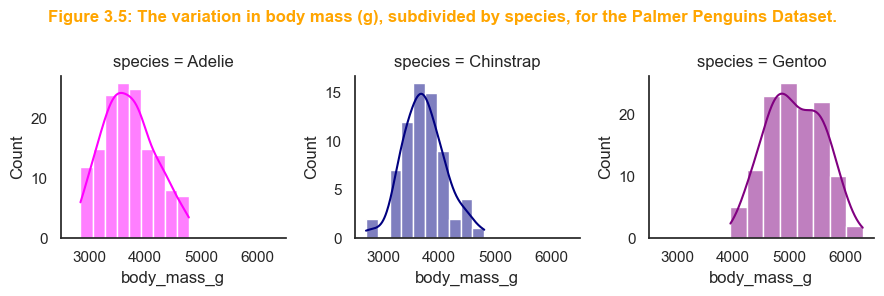

In [61]:
# It would be nice to see 3 different graphs, one for each species

species_colours = {'Adelie': 'magenta','Gentoo': 'purple','Chinstrap': 'navy'}
plt.figure(figsize=(9, 4))
sns.histplot(dfcleaned, x='body_mass_g', hue='species', palette=species_colours,edgecolor='black')
plt.suptitle('Figure 3.4: The variation in body mass (g) for the Palmer Penguins Dataset.', 
             fontsize=14,fontweight='bold', color='orange')
plt.tight_layout()
plt.show()

g = sns.FacetGrid(dfcleaned, col='species', col_wrap=3, sharex=False, sharey=False, hue= 'species', 
palette=species_colours)
#  sharex=False, sharey=False, code for the sharing of the x and y axis.
g.map(sns.histplot, 'body_mass_g', kde=True)
g.set(xlim=(2500, 6500))
# The x axis was set, to ensure equal comparission between the weights for all species.
plt.suptitle('Figure 3.5: The variation in body mass (g), subdivided by species, for the Palmer Penguins Dataset.', 
             fontsize=12,fontweight='bold', color='orange')
plt.tight_layout()
plt.show()


<span style="color:orange"> Visualising the relationships between the variables <span>

As defined by [Geeks for Geeks](https://www.geeksforgeeks.org/python-seaborn-pairplot-method/), pairplots plot multiple pairwise bivariate distributions in a dataset. The make it easier to visuallise relationships between variables, while allowing for differentiation by categorical variables.

The pairplot (Figure 3.2), created a visualisation of the species variation for each quantitative variable. We can see that Adelie penguins appear to have shorter but wider bills (mm), the Chinstrap penguins appear to have a more proportional beaks, with the Gentoo penguins have longer and more narrow beaks.

For weight, the Gentoo penguins appear to be the heavest of the three species, with body mass (g) visually looking like it may correlate with flipper length (mm), for the data set at a whole and potentially within species also. This would need further investigation for statistical confirmation.

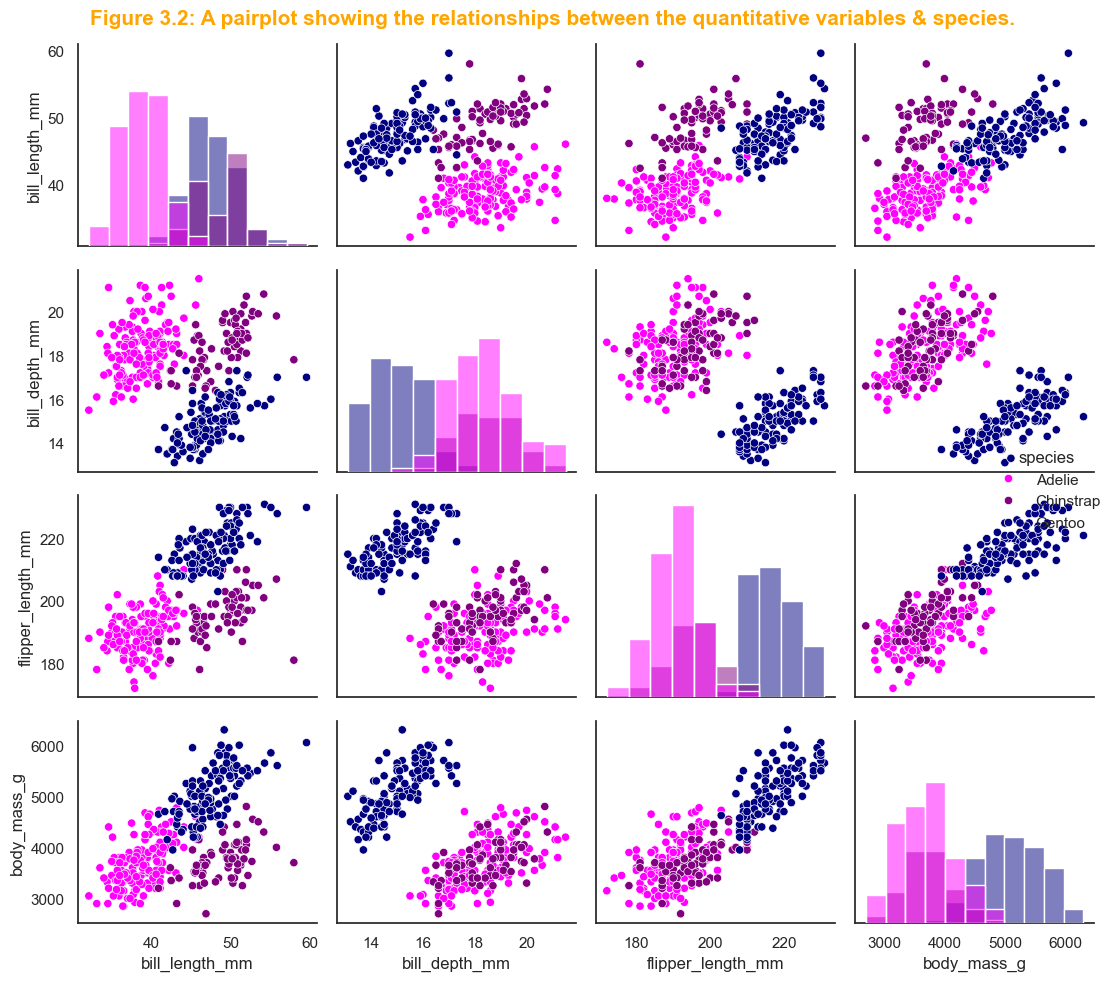

In [62]:
# Seabord: Pairplot can be used to create a figure containing a histogram for all 
# Reference: <https://seaborn.pydata.org/generated/seaborn.PairGrid.html>
sns.pairplot(dfcleaned, hue = 'species', diag_kind = 'hist', palette = ['magenta','purple','navy'])
plt.suptitle('Figure 3.2: A pairplot showing the relationships between the quantitative variables & species.', 
             fontsize=15,fontweight='bold', color='orange')

plt.tight_layout()
plt.show()

The descriptive statistics highlighted that the male penguins present larger for all measured variables, within all 3 species. This would suggest the presence of sexual dimorphism. A pair plot was create for all variables, subdivided by sex and not species. This pairplot echoed the results of the descriptive statistics, with the male penguins measuring larger for all variables.  

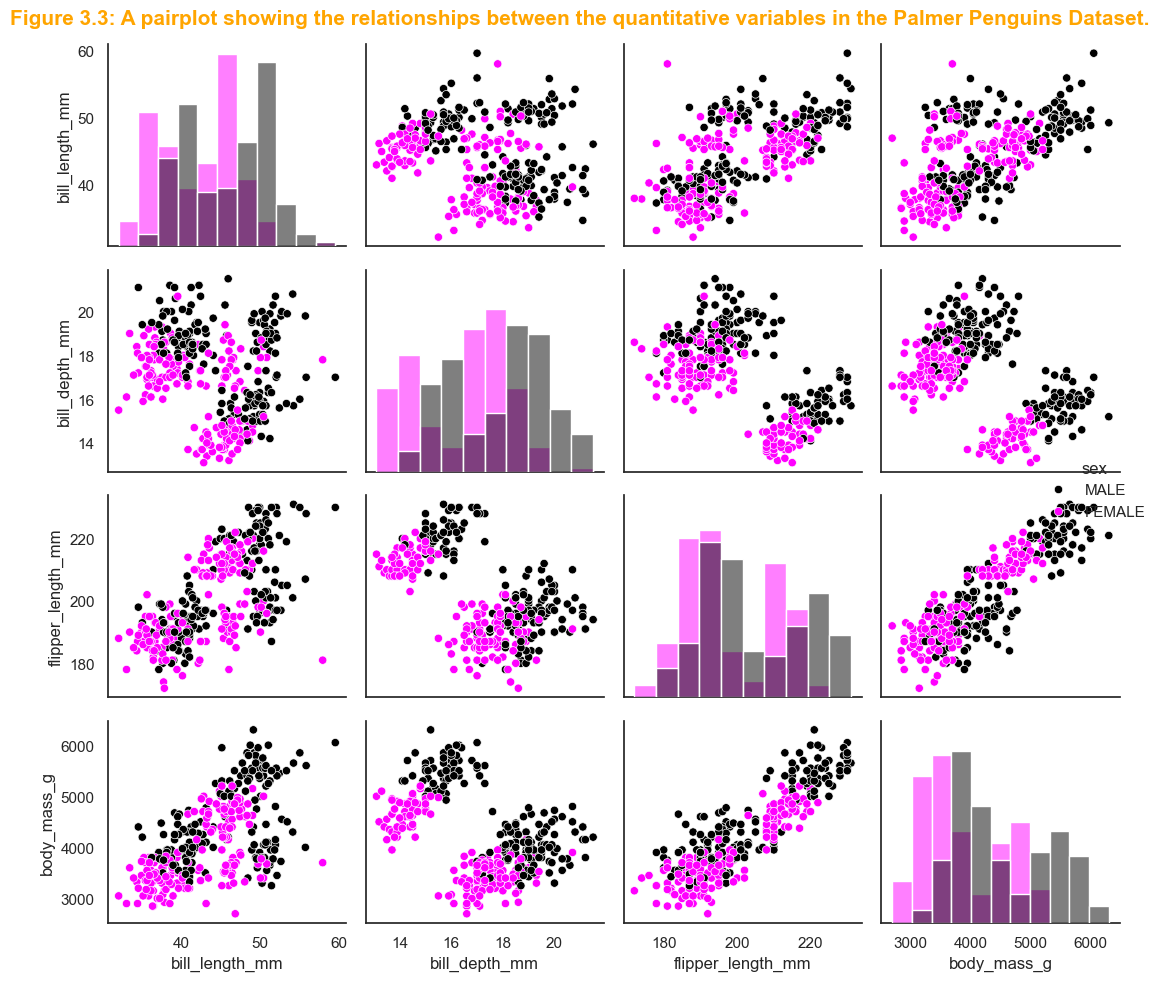

In [63]:
sns.pairplot(dfcleaned, hue = 'sex', diag_kind = 'hist', palette = ['black','magenta'])
plt.suptitle('Figure 3.3: A pairplot showing the relationships between the quantitative variables in the Palmer Penguins Dataset.', 
             fontsize=15, fontweight='bold', color='orange')
plt.tight_layout()
plt.show()


<span style="color:orange"> Body mass variation within the Palmer Penguins dataset. <span>

We can appromimate which variables could possibly be correlated from the pairplots in figure 3.1 & 3.2. Visually, flipper length and body mass appear correlated, 

From the summary statistics (Tables 3.3, 3.4 & 3.5) body mass appears to display the most variation, so I decided to plot the weight of the penguins, according to species, using a histogram. From figure e can clearly see that the Adelie penguins are the lightest species and the Gentoo the heaviest penguins. This variation is easier to observe from the first plot, they are are plotted on the same axis. 

The second plot includes a Gausiann curve, which helps us to visual the normality of the data. Both the Adelie and the Gentoo datasets appear to follow a normal, ball shaped distribution curve. The curve of the Chinstrap data is appears to have 2 peaks, which could be indicitative of sexual dimorphism within the Chinstrap species. &

***
#### <span style="color:orange"> 3.4    Data Correlation <span>

Clarke (2021), defines [Pearson’s product moment correlation](https://practicaldatascience.co.uk/data-science/how-to-visualise-correlations-using-pandas-and-seaborn) as, “*a statistical method to measure the strength of the linear relationship between variables*”.

The model examines two variables, and returns an *r* value between -1 and 1, indicating the strength of their linear correlation. The closer the value is to 1, the higher the correlation. A positive *r* value indicates a positive relationship between the variables and a negative *r* value a negative relative relationship. An *r* value of 1 would indicate a perfect relationship between the analysed variables. We can assess variable correlation using a table or visually using a heatmap.

<div align="center">

| Correlation Co-efficient|Strength of Association  | 
|---------------          |--------------           |
| 0< *r* >0.39            | Low                     |
| 0.4< *r* >0.59          | Moderate                |    
| 0.6< *r* >0.99          | High                    | 


First, lets look at the dataset as a whole. Correlations can only be complete on quantitative variables, hence we wil look at:
- Bill length (mm).
- Bill depth (mm).
- Flipper length (mm).
- Body mass (g).

In [64]:
# Let look at the data set as a whole.
# As there was issues with cleaning data that would later be needed for analysis, i decided it best to reload the data under
# a different name, just for this plot/clean.

df1 = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
pd.options.mode.copy_on_write = True
df1.drop(['species', 'island','sex'],axis=1, inplace=True)
print ('Table 3.13: The Pearsons correlation for the quantitative variables in the Palmers Penguins Dataset')
df1.corr()

Table 3.13: The Pearsons correlation for the quantitative variables in the Palmers Penguins Dataset


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


When looking at the data set as a whole (Table 3.13), we can see that:
- Flipper length and body mass have a strong positive correlation (p=0.87).
- Flipper length also has a strong positive correlation with bill length (p=0.65).
- Bill length and body mass are also positively correlated (p=0.59)
- Flipper length and bill depth are negatively correlated (p= -0.58).

Lets visualise this using a heatmap (Figure 3.4). We can also see if this correlation is affected by the sex of the pemguins by subdividing the dataframe by sex and re-analyising.Lets see if these correlations are influences by both species and sex.

<span style="color:orange"> Correlation with in the dataset subdivided by sex <span>

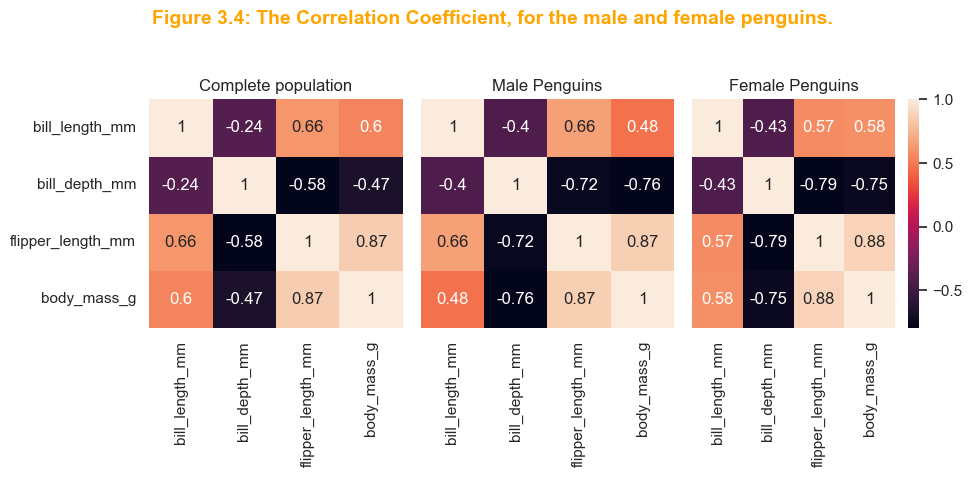

In [79]:
pd.options.mode.copy_on_write = True # This is to overcome 'Copy Over write'

# Create a figure with 3 subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# The whole population
corr_df1 = df1.corr()
sns.heatmap(corr_df1, annot=True, cbar=False, ax=axs[0])
axs[0].set_title('Complete population')

# Male penguins
male_df = dfcleaned[dfcleaned['sex'] == 'MALE']
male_df = male_df.drop(['species', 'island', 'sex'], axis=1)
corr_male = male_df.corr()
sns.heatmap(corr_male, annot=True, cbar=False, ax=axs[1], yticklabels=False)
axs[1].set_title('Male Penguins')

# Female Penguins
female_df = dfcleaned[dfcleaned['sex'] == 'FEMALE']
female_df = female_df.drop(['species', 'island', 'sex'], axis=1)
corr_female = female_df.corr()
sns.heatmap(corr_female, annot=True, cbar=True, ax=axs[2], yticklabels=False)
axs[2].set_title('Female Penguins')

# Set the overall title for all subplots
plt.suptitle('Figure 3.4: The Correlation Coefficient, for the male and female penguins.', 
             fontsize=14, fontweight='bold', color='orange')

# Adjust layout for a better fit
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()


From figure 3.4, we can see that the majority of the correlation visible in the whole population is also present in subpopulations, males and female penguins.
- In the overall population, there is a positive correlation between flipper length (mm) and body mass (g) (p=0.87), which is echoed inboth the male (p=0.87) and fmelae (p=0.88) subpopulations.
- In the over all population, there is a negative correlation between flipper length (mm) and bill depth (mm) (p= -0.58), however when you look at this pair of vairables in the male penguins, we can see that the negative correlation is far stronger (p=-0.72) and even more so for the female penguins (p=-0.79)

<span style="color:orange"> Correlation coefficients for each of the penguin species <span>

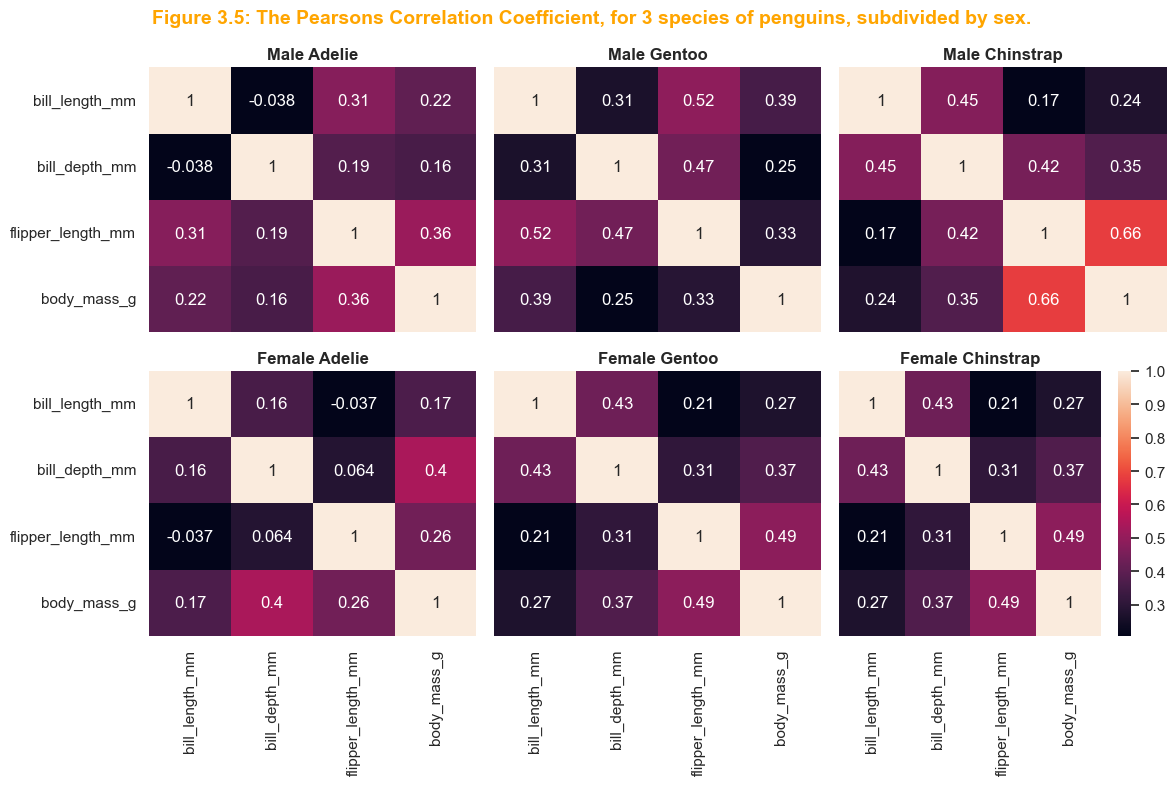

In [87]:
pd.options.mode.copy_on_write = True # This is to overcome 'Copy Over write'

# Lets try and visualise that correlation between variables for the male Adelie penguins.
adelie_df = dfcleaned[dfcleaned['species'] == 'Adelie']
male_adelie_df = adelie_df[adelie_df['sex'] == 'MALE']
male_adelie_df.drop(['species', 'island','sex'],axis=1, inplace=True)
corr_ma = male_adelie_df.corr()

# Female Adelie 
female_adelie_df = adelie_df[adelie_df['sex'] == 'FEMALE']
female_adelie_df.drop(['species', 'island','sex'],axis=1, inplace=True)
corr_fa = female_adelie_df.corr()

# Now the Gentoo species- Male Gentoo
gentoo_df=df[df['species'] == 'Gentoo']
male_gentoo_df = gentoo_df[gentoo_df['sex'] == 'MALE']
male_gentoo_df.drop(['species', 'island','sex'],axis=1, inplace=True)
corr_mg = male_gentoo_df.corr()

# Female Gentoo
female_gentoo_df = gentoo_df[gentoo_df['sex'] == 'FEMALE']
female_gentoo_df.drop(['species', 'island','sex'],axis=1, inplace=True)
corr_fg = female_gentoo_df.corr()

# And finally the Chinstapp species- Male Chinstrap
chinstrap_df=df[df['species'] == 'Chinstrap']
male_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'MALE']
male_chinstrap_df.drop(['species', 'island','sex'],axis=1, inplace=True)
corr_mc = male_chinstrap_df.corr()

# Female Chinstrap
female_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'FEMALE']
corr_fc = female_gentoo_df.corr()

# Combining all heatmaps into a single figure.
fig, axs = plt.subplots(2, 3, figsize=(12,8))
sns.set_theme(style="white")
sns.heatmap(corr_ma, annot=True, ax=axs[0, 0], cbar=False, xticklabels=False)
sns.heatmap(corr_mg, annot=True, ax=axs[0, 1], cbar=False, yticklabels=False, xticklabels=False)
sns.heatmap(corr_mc, annot=True, ax=axs[0, 2], cbar=False, yticklabels=False, xticklabels=False)
sns.heatmap(corr_fa, annot=True, ax=axs[1, 0], cbar=False)
sns.heatmap(corr_fg, annot=True, ax=axs[1, 1], cbar=False,yticklabels=False)
sns.heatmap(corr_fc, annot=True, ax=axs[1, 2], cbar=True, yticklabels=False)

# Define a colormap 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Add titles or adjust other plot settings as needed
axs[0, 0].set_title("Male Adelie", fontsize=12, fontweight='bold')
axs[0, 1].set_title("Male Gentoo", fontsize=12, fontweight='bold')
axs[0, 2].set_title("Male Chinstrap", fontsize=12, fontweight='bold')
axs[1, 0].set_title("Female Adelie", fontsize=12, fontweight='bold')
axs[1, 1].set_title("Female Gentoo", fontsize=12, fontweight='bold')
axs[1, 2].set_title("Female Chinstrap", fontsize=12, fontweight='bold')

fig.suptitle ('Figure 3.5: The Pearsons Correlation Coefficient, for 3 species of penguins, subdivided by sex.', 
             fontsize=14,fontweight='bold', color='orange')
plt.tight_layout()
plt.show()

Lets look at the correlation present between each of the variables so that we can make a statsitically based decision as to which variables we wish to focus the rest of the project on.

An analysis of the above heat map reveals that the Chinstrap penguins displayed the highest correlations between quantitative variables.

This can be done 

***
#### <span style="color:orange"> 3.5    Regression Analysis <span>

Lets look at the correlation / regression for the variables body mass and flipper length, using the whole data set.

Text(200, 3400, 'y = -5780.83 + 49.69x')

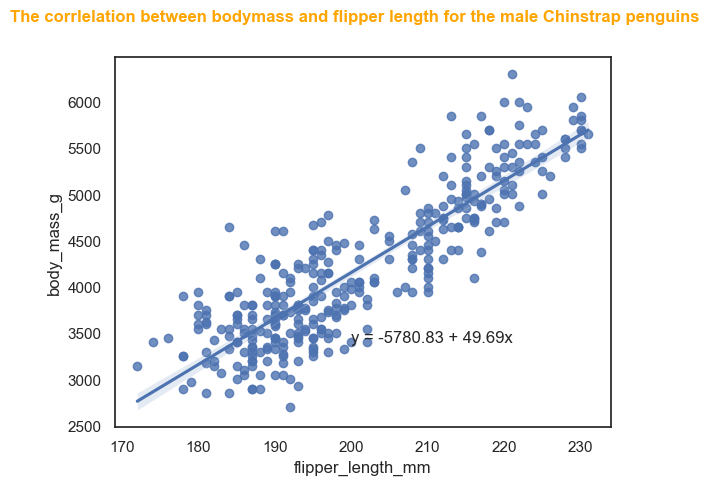

In [71]:
# The code for this regplot was sourced from <https://www.statology.org/seaborn-regplot-equation/>. 
# and maipulated to suit the needs of this project

#create regplot
p = sns.regplot(df1, x=df1.flipper_length_mm, y=df1.body_mass_g)

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#add regression equation to plot
plt.suptitle ('The corrlelation between bodymass and flipper length for the male Chinstrap penguins', 
             fontsize=12,fontweight='bold', color='orange')
plt.text(200, 3400, 'y = ' + str(round(intercept,2)) + ' + ' + str(round(slope,2)) + 'x')

In [72]:
# The following code was prompted from Microsoft Co-Pilot
import scipy.stats

# Create the regression plot with hue
plot = sns.lmplot(dfcleaned, x=dfcleaned.flipper_length_mm, y=dfcleaned.body_mass_g, hue='sex')


# Calculate the slope and intercept of the regression line for each category
# This assumes that 'category_variable' has two unique categories. Adjust as needed.
slope1, intercept1, r1, p1, std_err1 = scipy.stats.linregress(
    dfcleaned[dfcleaned['sex'] == dfcleaned['MALE'].unique()[0]][['flipper_length_mm', 'body_mass_g']])
slope2, intercept2, r2, p2, std_err2 = scipy.stats.linregress(
    dfcleaned[dfcleaned['sex'] == dfcleaned['FEMALE'].unique()[1]][['flipper_length_mm', 'body_mass_g']])

# Add the regression equation annotations to the plot
plt.text(200, 3400, f'y = {round(intercept1, 2)} + {round(slope1, 2)}x', 
         color=plot._legend_data[dfcleaned['MALE'].unique()[0]].get_facecolor())
plt.text(200, 3300, f'y = {round(intercept2, 2)} + {round(slope2, 2)}x', 
         color=plot._legend_data[dfcleaned['FEMALE'].unique()[1]].get_facecolor())
'''plt.text(200, 3400,'y = ' + str(round(intercept1,2)) '+' 
         +str(round(slope1,2)) +'x', color=plot._legend_data[df['MALE'].unique()[0]].get_facecolor())
plt.text(200, 3300, 'y =' +str(round(intercept2,2)) '+' 
         str(round(slope2,))+'x', color=plot._legend_data[df['FEMALE'].unique()[1]].get_facecolor())

#plt.text(200, 3400, 'y = ' + str(round(intercept,2)) + ' + ' + str(round(slope,2)) + 'x')
# Show the plot'''
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

Text(200, 3400, 'y = -4111.35 + 40.27x')

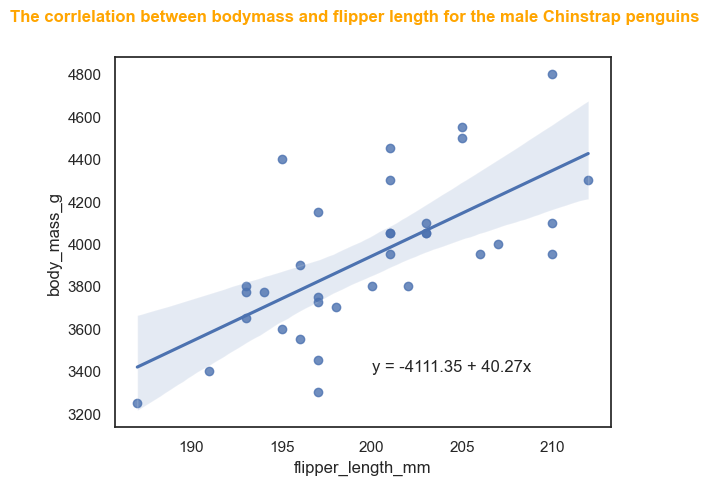

In [ ]:
# The code for this regplot was sourced from <https://www.statology.org/seaborn-regplot-equation/>. 
# and maipulated to suit the needs of this project

#create regplot
p = sns.regplot(male_chinstrap_df, x=male_chinstrap_df.flipper_length_mm, y=male_chinstrap_df.body_mass_g)

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#add regression equation to plot
plt.suptitle ('The corrlelation between bodymass and flipper length for the male Chinstrap penguins', 
             fontsize=12,fontweight='bold', color='orange')
plt.text(200, 3400, 'y = ' + str(round(intercept,2)) + ' + ' + str(round(slope,2)) + 'x')
# (200,3400) represent the position for the equation on the graph, the '2', represents the number of decimals to present.

## <span style="color:orange"> **4.    Discussion and Conclusions**<span>
***

## <span style="color:orange"> **5. References** <span>
***

Bankar R (2023) Supervised Learning with Scikit-learn. (URL: https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a) Accessed: 21/04/2024.

Chauhan A (2023) In-depth Handling/Imputation Techniques of Missing Values in Feature Transformation. (URL: https://towardsai.net/p/machine-learning/in-depth-handling-imputation-techniques-of-missing-values-in-feature-transformation). Accessed: 21/04/2024.

Clark. M (2021) How to visualise correlations using Pandas and Seaborn (URL: https://practicaldatascience.co.uk/data-science/how-to-visualise-correlations-using-pandas-and-seaborn) Accessed: 18/04/2024.

Dash SK (2022) Data Exploration and Visualisation Using Palmer Penguins Dataset. (URL: https://www.analyticsvidhya.com/blog/2022/04/data-exploration-and-visualisation-using-palmer-penguins-dataset). Accessed: 21/04/2024.

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. (URL:https://doi.org/10.1371/journal.pone.0090081)

Yakuba A (2023) Python Data Analysis Project — Palmer Penguins Dataset. (URL: https://yabdulmalik.medium.com/python-data-analysis-project-palmer-penguins-dataset-411a1e0b8c7d). Accessed 24/04/2024


***
### <span style="color:orange"> End